## Phase One Project Submission

* Student name: Lydia Cuffman, Ramses Nestor Reis, Michael Romanski
* Student pace: full time
* Scheduled project review date/time: July 14, 2023
* Instructor name: Daniel Burdeno

### Overview

Our client is looking to enter the aviation industry and has asked us to determine how to maximize safety in this endeavor. Using data provided by the National Transportation Safety Board (NTSB) we have determined the following:

*Our client should invest in a Boeing aircraft that has at least two engines. 

*Our client should fly on-demand, unscheduled operations under Federal Aviation Regulation Part 135. 

*Our client should pursue regional business in the United States but outside of the Northeast.


### Business Understanding

Our client's top concern is safety. They want to know what type of aircraft is safest and how to ensure it flies safely. This benefits their bottom line too, because a focus on safety can burnish their brand in the eyes of customers. Safe flights also protect their capital investment.

### Data Understanding

This data represents aviation accidents and incidents documented by the NTSB from 1968 to present. It provides details about the make and model of the aircraft involved as well as the type and number of engines. The data include numbers of injuries, categorized by severity. Entries also detail the location of the accident, the rules the plane was flying under, the date of the incident, and whether the pilot could fly visually (good weather) or with instruments (poor weather).

The biggest limitation of this dataset is that it only includes flights that had a problem. Theoretically, a perfect plane would never crash and thus would not appear in this dataset. While the data did not allow us to determine the ratio of uneventful flights to crashes, we were able to find valuable information about the severity of crashes. Our analysis shows the likelihood of injury if a particular plane does crash. Realistically, accidents do happen and there are no perfect aircraft. We can tell our client which planes are the safest when things go wrong.

### Data Analysis

In [125]:
#Import Packages
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [126]:
# Loading in Aviation_data.csv
df = pd.read_csv('data/Aviation_Data.csv')

/Users/Lydia/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [127]:
# Creating a new DataFrame to keep original intact
aviation_df = df.copy()

We quickly eliminated columns that were not germane to our analysis. For example, our client is not seeking to purchase an already existing commercial airline, so "Air.carrier" was not useful. "Broad.phase.of.flight" would probably yield good information about the relative safety of various parts of a flight, but we wouldn't be able to recommend to our client that they avoid takeoffs and landings altogether, should we discover they were the most dangerous phases. Some categories like "Registration.Number" and "Investigation.Type" were more connected to internal NTSB processes.

In [128]:
# Selecting relevant columns for analysis
aviation_df = aviation_df.drop(['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'Publication.Date', 'Air.carrier', 'Broad.phase.of.flight', 'Event.Id', 'Accident.Number', 'Investigation.Type', 'Registration.Number', 'Schedule'], axis=1)
aviation_df                               

,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause
2,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause
3,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause
4,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,"Annapolis, MD",United States,Minor,NaN,PIPER,PA-28-151,No,NaN,NaN,091,Personal,0.0,1.0,0.0,0.0,NaN,NaN
90344,2022-12-26,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90345,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,Personal,0.0,0.0,0.0,1.0,VMC,NaN
90346,2022-12-26,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,No,NaN,NaN,091,Personal,0.0,0.0,0.0,0.0,NaN,NaN


Then we began cleaning the data.

In [129]:
# Replacing dot to space in column names
aviation_df = aviation_df.rename(columns=lambda x: x.replace('.', ' '))

In [130]:
# Capitalizing all values in Make
aviation_df['Make'] = aviation_df['Make'].str.capitalize()

In [131]:
# Capitalizing all columns
aviation_df = aviation_df.rename(columns=str.capitalize)

We made a new data frame of U.S. states and their region, and prepped the aviation_df to join it.

In [132]:
# Changing location to just the state abbreviation
aviation_df['Location'] = aviation_df['Location'].str[-2:]

In [133]:
# Reading in data that pairs each state abbreviation with its census-designated region
states_df = pd.read_csv('data/Census_regions.csv')

### Data from here: https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv

In [134]:
states_df = states_df.drop(['State','Division'], axis=1)

In [135]:
states_df.set_index('State Code', inplace=True)

In [136]:
aviation_df = aviation_df.rename(columns={'Location':'State Code'})

In [137]:
aviation_df = aviation_df.join(states_df, on='State Code', how='left')

The FAR descriptions were messy and inconsistent. We needed to do a lot of renaming to properly categorize them.

In [138]:
aviation_df.rename(columns={'Far description': 'FAR description'}, inplace=True)

In [139]:
aviation_df.groupby('FAR description').sum()

,Number of engines,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured
FAR description,,,,,
091,18655.0,5450.0,4741.0,3197.0,19713.0
091K,24.0,0.0,4.0,1.0,42.0
103,2.0,0.0,0.0,2.0,0.0
107,8.0,0.0,0.0,1.0,6.0
121,1221.0,68.0,777.0,250.0,64254.0
125,10.0,4.0,0.0,1.0,62.0
129,147.0,55.0,211.0,76.0,12828.0
133,110.0,34.0,25.0,31.0,61.0
135,995.0,395.0,285.0,193.0,2455.0


In [140]:
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Part 91: General Aviation", "091")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Part 91F: Special Flt Ops.", "091")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("091K", "091")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("NUSC", "Non-U.S., Commercial")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("NUSN", "Non-U.S., Non-Commercial")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Part 121: Air Carrier", "121")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Part 125: 20+ Pax,6000+ lbs", "125")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Part 129: Foreign", "129")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Part 133: Rotorcraft Ext. Load", "133")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Part 135: Air Taxi & Commuter", "135")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Part 137: Agricultural", "137")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("PUBU", "Public Use")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("Public Aircraft", "Public Use")
aviation_df["FAR description"]= aviation_df["FAR description"].replace("UNK", "Unknown")

In [141]:
# Changing Event.Date to datetime and creating a year column
aviation_df['Event date'] = pd.to_datetime(aviation_df['Event date'])
aviation_df['Year'] = aviation_df['Event date'].dt.year
aviation_df['Year'] = aviation_df['Year'].astype('Int64')

We didn't find any entries with nulls listed for all injury categories, so we decided that null values likely represented zeroes. Since every entry had at least some data for injury counts or uninjured passengers, it seemed likely that missing values were zero.

In [142]:
# Filling all Total Injury-related columns Null data with 0
aviation_df.fillna(value={'Total fatal injuries': 0, 'Total serious injuries': 0, 'Total minor injuries': 0, 'Total uninjured': 0}, inplace=True)

In [143]:
#Drop Amateur Built projects because we will not be recommending amateur products to our client. 
aviation_df.drop(aviation_df[aviation_df['Amateur built'] == 'Yes'].index, inplace = True)

In [144]:
#No longer need column since all remaining entries are professionally built
aviation_df = aviation_df.drop(['Amateur built'], axis = 1)

Our client values safety above all, and we cannot really determine the safety of unique aircraft. It is unlikely that our client would have the opportunity to purchase a rare or limited-production plane anyway, so we dropped all "Make" values that were less than 1% of the total dataset. Such planes are too unusual to make a good assessment of their safety. We also dropped entries that did not list "Make" because we cannot recommend a plane if we don't know what type it is.

In [145]:
# Drop the values in 'Make' that constitute less than 1% of the total data in 'Make' column
aviation_df = aviation_df[~aviation_df['Make'].isin(aviation_df['Make'].value_counts()[aviation_df['Make'].value_counts() < 84].index)]

In [146]:
# Dropping all rows containing null values from Make, as without a Plane make, the other information is invalid
df.dropna(subset=['Make'], inplace=True)

In [147]:
#Change “Number of engines” nulls to 1, as that is the mode and has a minimal impact on the data distribution
aviation_df['Number of engines'].fillna(1, inplace=True)

In [148]:
aviation_df.dropna(subset = ['Year'], inplace=True)

In [149]:
# Filling in remaining null values in aviation_df with Unknown
aviation_df.fillna('Unknown', inplace=True)

We wanted to determine the chance of injury if a plane was in a crash, so we estimated total passengers per flight by adding all the injured passenger counts to the uninjured count. Each category ("fatal," "serious," "minor," and "uninjured") seemed exclusive, so adding them together gives a good indication of the number of passengers on board.

In [150]:
aviation_df['Total passengers'] = aviation_df['Total fatal injuries'] + aviation_df['Total serious injuries'] + aviation_df['Total minor injuries'] + aviation_df['Total uninjured']

In [151]:
aviation_df = aviation_df[aviation_df['Total passengers'] != 0]

With our new metrics for injuries, we looked at percentage chance of injury by number of engines.

In [152]:
grouped_df = aviation_df.groupby("Number of engines").agg({"Total fatal injuries": "sum", "Total serious injuries": "sum", "Total minor injuries": "sum", "Total uninjured": "sum", "Total passengers": "sum"})

In [153]:
grouped_df["Percentage chance of fatal injury"] = (grouped_df["Total fatal injuries"] / grouped_df["Total passengers"]) * 100
grouped_df["Percentage chance of serious injuries"] = (grouped_df["Total serious injuries"] / grouped_df["Total passengers"]) * 100
grouped_df["Percentage chance of minor injuries"] = (grouped_df["Total minor injuries"] / grouped_df["Total passengers"]) * 100
grouped_df["Percentage chance of being uninjured"] = (grouped_df["Total uninjured"] / grouped_df["Total passengers"]) * 100

In [154]:
grouped_df['Overall chance of injury'] = grouped_df["Percentage chance of fatal injury"] + grouped_df["Percentage chance of serious injuries"] + grouped_df["Percentage chance of minor injuries"] 

In [155]:
grouped_df.head()

,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Total passengers,Percentage chance of fatal injury,Percentage chance of serious injuries,Percentage chance of minor injuries,Percentage chance of being uninjured,Overall chance of injury
Number of engines,,,,,,,,,,
0.0,308.0,242.0,243.0,2383.0,3176.0,9.697733,7.619647,7.651134,75.031486,24.968514
1.0,30171.0,13344.0,16781.0,136030.0,196326.0,15.367807,6.796858,8.547518,69.287817,30.712183
2.0,9372.0,3040.0,4099.0,178532.0,195043.0,4.805094,1.558631,2.101588,91.534687,8.465313
3.0,769.0,325.0,1148.0,50600.0,52842.0,1.455282,0.615041,2.172514,95.757163,4.242837
4.0,1655.0,227.0,483.0,40500.0,42865.0,3.860959,0.529570,1.126793,94.482678,5.517322


Yikes! Passengers on one-engine planes have a way higher chance of fatality and any other kind of injury. The same is true of zero-engine aircraft, though it was unlikely we would recommend our client invest in hot air balloons. We opted to exclude zero and one engine aircraft from our data set, because as a category they were far more dangerous.

In [156]:
aviation_df = aviation_df[(aviation_df['Number of engines'] != 0) & (aviation_df['Number of engines'] != 1)]

With our curated list of planes, we then tried to figure out which make was the safest.

In [157]:
# Calculate the total number of accidents for each make 
accidents_count = aviation_df.groupby(["Make"]).size().reset_index(name="total_accidents")
accidents_count

,Make,total_accidents
0,Aero commander,185
1,Aerospatiale,102
2,Aerostar,9
3,Airbus,110
4,Airbus industrie,116
5,Beech,1972
6,Bell,131
7,Boeing,1254
8,British aerospace,77
9,Cessna,2289


In [158]:
#A few of these makes are listed twice. Let's clean that up.
aviation_df["Make"]= aviation_df["Make"].replace("Airbus industrie", "Airbus")
aviation_df["Make"]= aviation_df["Make"].replace("Dehavilland", "De havilland")

In [159]:
# Calculate the total number of injuries for each make 
injuries_count = aviation_df.groupby(["Make"])[["Total fatal injuries", "Total serious injuries", "Total minor injuries", 'Total uninjured']].sum().reset_index()
injuries_count

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured
0,Aero commander,141.0,50.0,41.0,287.0
1,Aerospatiale,71.0,34.0,39.0,2092.0
2,Aerostar,7.0,1.0,0.0,13.0
3,Airbus,1081.0,174.0,454.0,33746.0
4,Beech,1563.0,347.0,457.0,4265.0
5,Bell,70.0,40.0,67.0,305.0
6,Boeing,2980.0,1299.0,1725.0,154098.0
7,British aerospace,118.0,32.0,30.0,1890.0
8,Cessna,1629.0,473.0,548.0,4655.0
9,Champion,0.0,0.0,1.0,4.0


In [160]:
# Calculate the percentage of accidents resulting in injuries for each make 
injury_percentage = pd.merge(injuries_count, accidents_count, on=["Make"])
total_people = injuries_count['Total fatal injuries'] + injuries_count['Total serious injuries'] + injuries_count['Total minor injuries'] + injuries_count['Total uninjured']
injury_percentage["Fatal percentage"] = (injury_percentage["Total fatal injuries"] / total_people) * 100
injury_percentage["Serious percentage"] = (injury_percentage["Total serious injuries"] / total_people) * 100
injury_percentage["Minor percentage"] = (injury_percentage["Total minor injuries"] / total_people) * 100
injury_percentage["Uninjured percentage"] = (injury_percentage["Total uninjured"] / total_people) * 100
injury_percentage

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,total_accidents,Fatal percentage,Serious percentage,Minor percentage,Uninjured percentage
0,Aero commander,141.0,50.0,41.0,287.0,185,27.167630,9.633911,7.899807,55.298651
1,Aerospatiale,71.0,34.0,39.0,2092.0,102,3.175313,1.520572,1.744186,93.559928
2,Aerostar,7.0,1.0,0.0,13.0,9,33.333333,4.761905,0.000000,61.904762
3,Airbus,1081.0,174.0,454.0,33746.0,110,3.048935,0.490763,1.280496,95.179805
4,Beech,1563.0,347.0,457.0,4265.0,1972,23.567551,5.232207,6.890832,64.309409
5,Bell,70.0,40.0,67.0,305.0,131,14.522822,8.298755,13.900415,63.278008
6,Boeing,2980.0,1299.0,1725.0,154098.0,1254,1.861313,0.811358,1.077438,96.249891
7,British aerospace,118.0,32.0,30.0,1890.0,77,5.700483,1.545894,1.449275,91.304348
8,Cessna,1629.0,473.0,548.0,4655.0,2289,22.299795,6.475017,7.501711,63.723477
9,Champion,0.0,0.0,1.0,4.0,3,0.000000,0.000000,20.000000,80.000000


In [161]:
injury_percentage["overall_injury_percentage"] = (injury_percentage["Total fatal injuries"] + injury_percentage["Total serious injuries"] + injury_percentage["Total minor injuries"]) / total_people * 100

In [162]:
injury_percentage

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,total_accidents,Fatal percentage,Serious percentage,Minor percentage,Uninjured percentage,overall_injury_percentage
0,Aero commander,141.0,50.0,41.0,287.0,185,27.167630,9.633911,7.899807,55.298651,44.701349
1,Aerospatiale,71.0,34.0,39.0,2092.0,102,3.175313,1.520572,1.744186,93.559928,6.440072
2,Aerostar,7.0,1.0,0.0,13.0,9,33.333333,4.761905,0.000000,61.904762,38.095238
3,Airbus,1081.0,174.0,454.0,33746.0,110,3.048935,0.490763,1.280496,95.179805,4.820195
4,Beech,1563.0,347.0,457.0,4265.0,1972,23.567551,5.232207,6.890832,64.309409,35.690591
5,Bell,70.0,40.0,67.0,305.0,131,14.522822,8.298755,13.900415,63.278008,36.721992
6,Boeing,2980.0,1299.0,1725.0,154098.0,1254,1.861313,0.811358,1.077438,96.249891,3.750109
7,British aerospace,118.0,32.0,30.0,1890.0,77,5.700483,1.545894,1.449275,91.304348,8.695652
8,Cessna,1629.0,473.0,548.0,4655.0,2289,22.299795,6.475017,7.501711,63.723477,36.276523
9,Champion,0.0,0.0,1.0,4.0,3,0.000000,0.000000,20.000000,80.000000,20.000000


Some planes had an injury rate of zero, but the make had only ever recorded one accident. We excluded models that had not reported many incidents because we did not have sufficient data to determine if they were consistently safe.

In [163]:
# Filter the injury_percentage DataFrame to include only aircrafts with a significant number of accidents
significant_accidents = injury_percentage[injury_percentage["total_accidents"] >= 100]

# Sort the significant_accidents DataFrame by the lowest overall percentage
safest_overall_aircrafts = significant_accidents.sort_values("overall_injury_percentage")
safest_overall_aircrafts

,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,total_accidents,Fatal percentage,Serious percentage,Minor percentage,Uninjured percentage,overall_injury_percentage
6,Boeing,2980.0,1299.0,1725.0,154098.0,1254,1.861313,0.811358,1.077438,96.249891,3.750109
21,Mcdonnell douglas,598.0,294.0,942.0,39011.0,371,1.464071,0.719794,2.306280,95.509854,4.490146
3,Airbus,1081.0,174.0,454.0,33746.0,110,3.048935,0.490763,1.280496,95.179805,4.820195
1,Aerospatiale,71.0,34.0,39.0,2092.0,102,3.175313,1.520572,1.744186,93.559928,6.440072
12,Embraer,291.0,76.0,79.0,4894.0,160,5.449438,1.423221,1.479401,91.647940,8.352060
11,Douglas,645.0,72.0,220.0,7924.0,226,7.279088,0.812549,2.482790,89.425573,10.574427
29,Swearingen,45.0,19.0,46.0,808.0,159,4.901961,2.069717,5.010893,88.017429,11.982571
10,De havilland,123.0,72.0,79.0,1732.0,126,6.131605,3.589232,3.938185,86.340977,13.659023
19,Learjet,100.0,12.0,37.0,289.0,104,22.831050,2.739726,8.447489,65.981735,34.018265
4,Beech,1563.0,347.0,457.0,4265.0,1972,23.567551,5.232207,6.890832,64.309409,35.690591


It looks like if you're going to be in a plane crash, you want to do it in a Boeing! They have recorded a high number of injuries, but that's because there are so many Boeings flying each day. Per incident, the injury rate is very low, as is the fatality rate. Mcdonnell Douglas and Airbus also posted very low overall injury percentages.

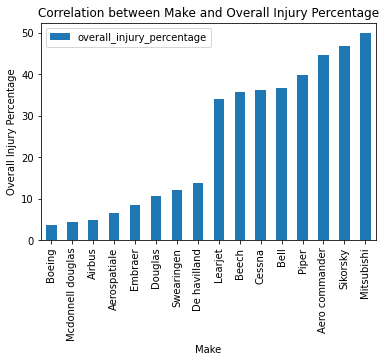

In [164]:
safest_overall_aircrafts.plot.bar(x='Make', y='overall_injury_percentage')
plt.xlabel('Make')
plt.ylabel('Overall Injury Percentage')
plt.title('Correlation between Make and Overall Injury Percentage')
plt.show()

We then took our top ten safest makes and looked back at number of engines.

In [165]:
aviation_df = aviation_df[(aviation_df['Make'] == 'Boeing') | (aviation_df['Make'] == 'Mcdonnell douglas') 
                          | (aviation_df['Make'] == 'Airbus') | (aviation_df['Make'] == 'Aerospatiale') | 
                          (aviation_df['Make'] == 'Embraer') | (aviation_df['Make'] == 'Douglas') |
                          (aviation_df['Make'] == 'Swearingen') | (aviation_df['Make'] == 'De havilland') |
                          (aviation_df['Make'] == 'Learjet') | (aviation_df['Make'] == 'Beech')]
                          

In [166]:
top_10_df = aviation_df.groupby(["Number of engines", "Make"]).agg({"Total fatal injuries": "sum", "Total serious injuries": "sum", "Total minor injuries": "sum", "Total uninjured": "sum", "Total passengers": "sum"})

In [167]:
top_10_df["Percentage chance of fatal injury"] = (top_10_df["Total fatal injuries"] / top_10_df["Total passengers"]) * 100
top_10_df["Percentage chance of serious injuries"] = (top_10_df["Total serious injuries"] / top_10_df["Total passengers"]) * 100
top_10_df["Percentage chance of minor injuries"] = (top_10_df["Total minor injuries"] / top_10_df["Total passengers"]) * 100
top_10_df["Percentage chance of being uninjured"] = (top_10_df["Total uninjured"] / top_10_df["Total passengers"]) * 100

In [168]:
top_10_df['Overall chance of injury'] = top_10_df["Percentage chance of fatal injury"] + top_10_df["Percentage chance of serious injuries"] + top_10_df["Percentage chance of minor injuries"]

In [169]:
top_10_df.head(30)

Total fatal injuries  \
Number of engines Make                                      
2.0               Aerospatiale                       71.0   
                  Airbus                           1081.0   
                  Beech                            1563.0   
                  Boeing                           1468.0   
                  De havilland                      123.0   
                  Douglas                           329.0   
                  Embraer                           291.0   
                  Learjet                           100.0   
                  Mcdonnell douglas                 303.0   
                  Swearingen                         45.0   
3.0               Boeing                            514.0   
                  Douglas                             0.0   
                  Mcdonnell douglas                 118.0   
4.0               Airbus                              0.0   
                  Boeing                            998.0   
                  De havilland                        0.0   
                  Douglas                           316.0   
                  Mcdonnell douglas                 177.0   

                                     Total serious injuries  \
Number of engines Make                                        
2.0               Aerospatiale                         34.0   
                  Airbus                              168.0   
                  Beech                               347.0   
                  Boeing                              976.0   
                  De havilland                         69.0   
                  Douglas                              56.0   
                  Embraer                              76.0   
                  Learjet                              12.0   
                  Mcdonnell douglas                   132.0   
                  Swearingen                           19.0   
3.0               Boeing                              124.0   
                  Douglas                               8.0   
                  Mcdonnell douglas                   160.0   
4.0               Airbus                                6.0   
                  Boeing                              199.0   
                  De havilland                          3.0   
                  Douglas                               8.0   
                  Mcdonnell douglas                     2.0   

                                     Total minor injuries  Total uninjured  \
Number of engines Make                                                       
2.0               Aerospatiale                       39.0           2092.0   
                  Airbus                            409.0          31804.0   
                  Beech                             457.0           4265.0   
                  Boeing                           1009.0          95296.0   
                  De havilland                       74.0           1495.0   
                  Douglas                            94.0           4653.0   
                  Embraer                            79.0           4894.0   
                  Learjet                            37.0            289.0   
                  Mcdonnell douglas                 398.0          21108.0   
                  Swearingen                         46.0            808.0   
3.0               Boeing                            342.0          24203.0   
                  Douglas                            86.0           1855.0   
                  Mcdonnell douglas                 533.0          16986.0   
4.0               Airbus                             45.0           1942.0   
                  Boeing                            374.0          34599.0   
                  De havilland                        5.0            237.0   
                  Douglas                            40.0           1416.0   
                  Mcdonnell douglas                  11.0            917.

In [170]:
top_10_df = top_10_df.sort_values(by='Overall chance of injury')

In [171]:
top_10_df.head(30)

Total fatal injuries  \
Number of engines Make                                      
4.0               Airbus                              0.0   
                  De havilland                        0.0   
2.0               Boeing                           1468.0   
                  Mcdonnell douglas                 303.0   
3.0               Boeing                            514.0   
4.0               Boeing                            998.0   
3.0               Mcdonnell douglas                 118.0   
                  Douglas                             0.0   
2.0               Airbus                           1081.0   
                  Aerospatiale                       71.0   
                  Embraer                           291.0   
                  Douglas                           329.0   
                  Swearingen                         45.0   
                  De havilland                      123.0   
4.0               Mcdonnell douglas                 177.0   
                  Douglas                           316.0   
2.0               Learjet                           100.0   
                  Beech                            1563.0   

                                     Total serious injuries  \
Number of engines Make                                        
4.0               Airbus                                6.0   
                  De havilland                          3.0   
2.0               Boeing                              976.0   
                  Mcdonnell douglas                   132.0   
3.0               Boeing                              124.0   
4.0               Boeing                              199.0   
3.0               Mcdonnell douglas                   160.0   
                  Douglas                               8.0   
2.0               Airbus                              168.0   
                  Aerospatiale                         34.0   
                  Embraer                              76.0   
                  Douglas                              56.0   
                  Swearingen                           19.0   
                  De havilland                         69.0   
4.0               Mcdonnell douglas                     2.0   
                  Douglas                               8.0   
2.0               Learjet                              12.0   
                  Beech                               347.0   

                                     Total minor injuries  Total uninjured  \
Number of engines Make                                                       
4.0               Airbus                             45.0           1942.0   
                  De havilland                        5.0            237.0   
2.0               Boeing                           1009.0          95296.0   
                  Mcdonnell douglas                 398.0          21108.0   
3.0               Boeing                            342.0          24203.0   
4.0               Boeing                            374.0          34599.0   
3.0               Mcdonnell douglas                 533.0          16986.0   
                  Douglas                            86.0           1855.0   
2.0               Airbus                            409.0          31804.0   
                  Aerospatiale                       39.0           2092.0   
                  Embraer                            79.0           4894.0   
                  Douglas                            94.0           4653.0   
                  Swearingen                         46.0            808.0   
                  De havilland                       74.0           1495.0   
4.0               Mcdonnell douglas                  11.0            917.0   
                  Douglas                            40.0           1416.0   
2.0               Learjet                            37.0            289.0   
                  Beech                             457.0           4265.

In [172]:
top_10_df.reset_index()

,Number of engines,Make,Total fatal injuries,Total serious injuries,Total minor injuries,Total uninjured,Total passengers,Percentage chance of fatal injury,Percentage chance of serious injuries,Percentage chance of minor injuries,Percentage chance of being uninjured,Overall chance of injury
0,4.0,Airbus,0.0,6.0,45.0,1942.0,1993.0,0.000000,0.301054,2.257903,97.441044,2.558956
1,4.0,De havilland,0.0,3.0,5.0,237.0,245.0,0.000000,1.224490,2.040816,96.734694,3.265306
2,2.0,Boeing,1468.0,976.0,1009.0,95296.0,98749.0,1.486597,0.988364,1.021782,96.503256,3.496744
3,2.0,Mcdonnell douglas,303.0,132.0,398.0,21108.0,21941.0,1.380976,0.601613,1.813956,96.203455,3.796545
4,3.0,Boeing,514.0,124.0,342.0,24203.0,25183.0,2.041059,0.492396,1.358059,96.108486,3.891514
5,4.0,Boeing,998.0,199.0,374.0,34599.0,36170.0,2.759193,0.550180,1.034006,95.656622,4.343378
6,3.0,Mcdonnell douglas,118.0,160.0,533.0,16986.0,17797.0,0.663033,0.899028,2.994887,95.443052,4.556948
7,3.0,Douglas,0.0,8.0,86.0,1855.0,1949.0,0.000000,0.410467,4.412519,95.177014,4.822986
8,2.0,Airbus,1081.0,168.0,409.0,31804.0,33462.0,3.230530,0.502062,1.222282,95.045126,4.954874
9,2.0,Aerospatiale,71.0,34.0,39.0,2092.0,2236.0,3.175313,1.520572,1.744186,93.559928,6.440072


Our top five safest aircraft are the four-engine Airbus, four-engine De Havilland, two-engine Boeing, two-engine McDonnell Douglas, and the three-engine Boeing. The four-engine Boeings were just outside the top five. We opted to recommend the Boeings and the two-engine McDonnell Douglas because the AirBus and De Havilland had substantially lower incident counts. We wanted to recommend a plane that was repeatedly proven to protect its passengers in the event of an accident.

After determining our pick for safest aircraft, we went back to our regional data to determine how many injuries were associated with a crash in each of our regions.

In [173]:
aviation_df['Total injuries']=aviation_df['Total fatal injuries']+aviation_df['Total serious injuries']+aviation_df['Total minor injuries']

In [174]:
region_counts = aviation_df['Region'].value_counts()
region_counts.sort_index(inplace=True)
region_counts

Midwest       876
Northeast     490
South        1571
Unknown       475
West         1303
Name: Region, dtype: int64

In [175]:
region_injuries = aviation_df.groupby(['Region'])['Total injuries'].sum()
region_injuries.sort_index(inplace=True)

In [176]:
region_injury_rate = region_injuries/region_counts
region_injury_rate.sort_index(inplace=True)
region_injury_rate

Region
Midwest       1.891553
Northeast     3.881633
South         1.861235
Unknown      10.290526
West          1.997698
dtype: float64

We determined that a crash in the Northeast had a higher chance of injury. (The "Unknown" category includes incidents outside the U.S. as well as any incident that did not list a location.)

An early exploration of the FAR description data showed that planes flying under Part 91 by far had the most injuries. But Part 91 is also very likely to be one-engine planes, since it is for general aviation, or non-commercial flying. We looked into the data without single-engine planes to see how many accidents were associated with crashes under each FAR protocol.

In [177]:
far_counts = aviation_df['FAR description'].value_counts()
far_counts.sort_index(inplace=True)
far_counts

091                          529
121                          512
125                            3
129                           44
133                            2
135                          135
Non-U.S., Commercial         129
Non-U.S., Non-Commercial      43
Public Use                    10
Unknown                     3308
Name: FAR description, dtype: int64

In [178]:
far_injuries = aviation_df.groupby(['FAR description'])['Total injuries'].sum()
far_injuries.sort_index(inplace=True)
far_injuries

FAR description
091                          717.0
121                         1127.0
125                            0.0
129                          472.0
133                            4.0
135                          110.0
Non-U.S., Commercial        1678.0
Non-U.S., Non-Commercial     104.0
Public Use                    17.0
Unknown                     9745.0
Name: Total injuries, dtype: float64

In [179]:
far_injury_rate = far_injuries/far_counts
far_injury_rate.sort_index(inplace=True)
far_injury_rate

FAR description
091                          1.355388
121                          2.201172
125                          0.000000
129                         10.727273
133                          2.000000
135                          0.814815
Non-U.S., Commercial        13.007752
Non-U.S., Non-Commercial     2.418605
Public Use                   1.700000
Unknown                      2.945889
dtype: float64

The highest injury rates were for Part 129 and for Non-U.S., Commercial, both of which apply to foreign flights. Some of the categories. like military and public use, are not relevant to our client. Of commercial and domestic options, Part 135 had the highest record of safety.

In [180]:
top_10_df.to_csv('top_aircraft.csv')

In [181]:
aviation_df.to_csv('cleaned_aviation.csv')

In [182]:
grouped_df.to_csv('injuries_from_num_engine.csv')

In [183]:
safest_overall_aircrafts.to_csv('injuries_from_make.csv')

In [184]:
region_injury_rate.to_csv('region_injury_rate.csv')

In [185]:
far_injury_rate.to_csv('far_injury_rate.csv')

### Recommendations

We offer our client the following recommendations:

*Invest in Boeing airplanes with two, three, or four engines. A two-engine McDonnell Douglas is also proven safe.

*Focus operations in the United States outside of the Northeast.

*Fly unscheduled, on-demand flights under Federal Aviation Regulation Part 135.

### Next Steps

Next steps for data analysis could include further investigation of the safest models of Boeing aircraft. We could also look more deeply into what might lead to accidents in the Northeast having more severe outcomes. We could use the weather data included in this dataset or seek other data to help us dig into that question.

Next steps for our client would involve researching price and availability of our recommended aircraft. They also might consider opportunities to align this new venture with their commercial interests and their social responsibility values. Many Part 135 operations serve isolated or underserved areas. This offers the company a chance to find untapped markets and possibly to also demonstrate their business' commitment to giving back.
